In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics.cluster import adjusted_rand_score

### Load data from wine.data.csv

In [80]:
df = pd.read_csv('wine.data.csv')

### Keep 1st column into a separate variable (label) and remove it from DataFrame.

In [81]:
label = df['Label']

In [82]:
df = df.drop(columns='Label')

### Use Scatter plot to learn attributes of data. What is your conclusion?

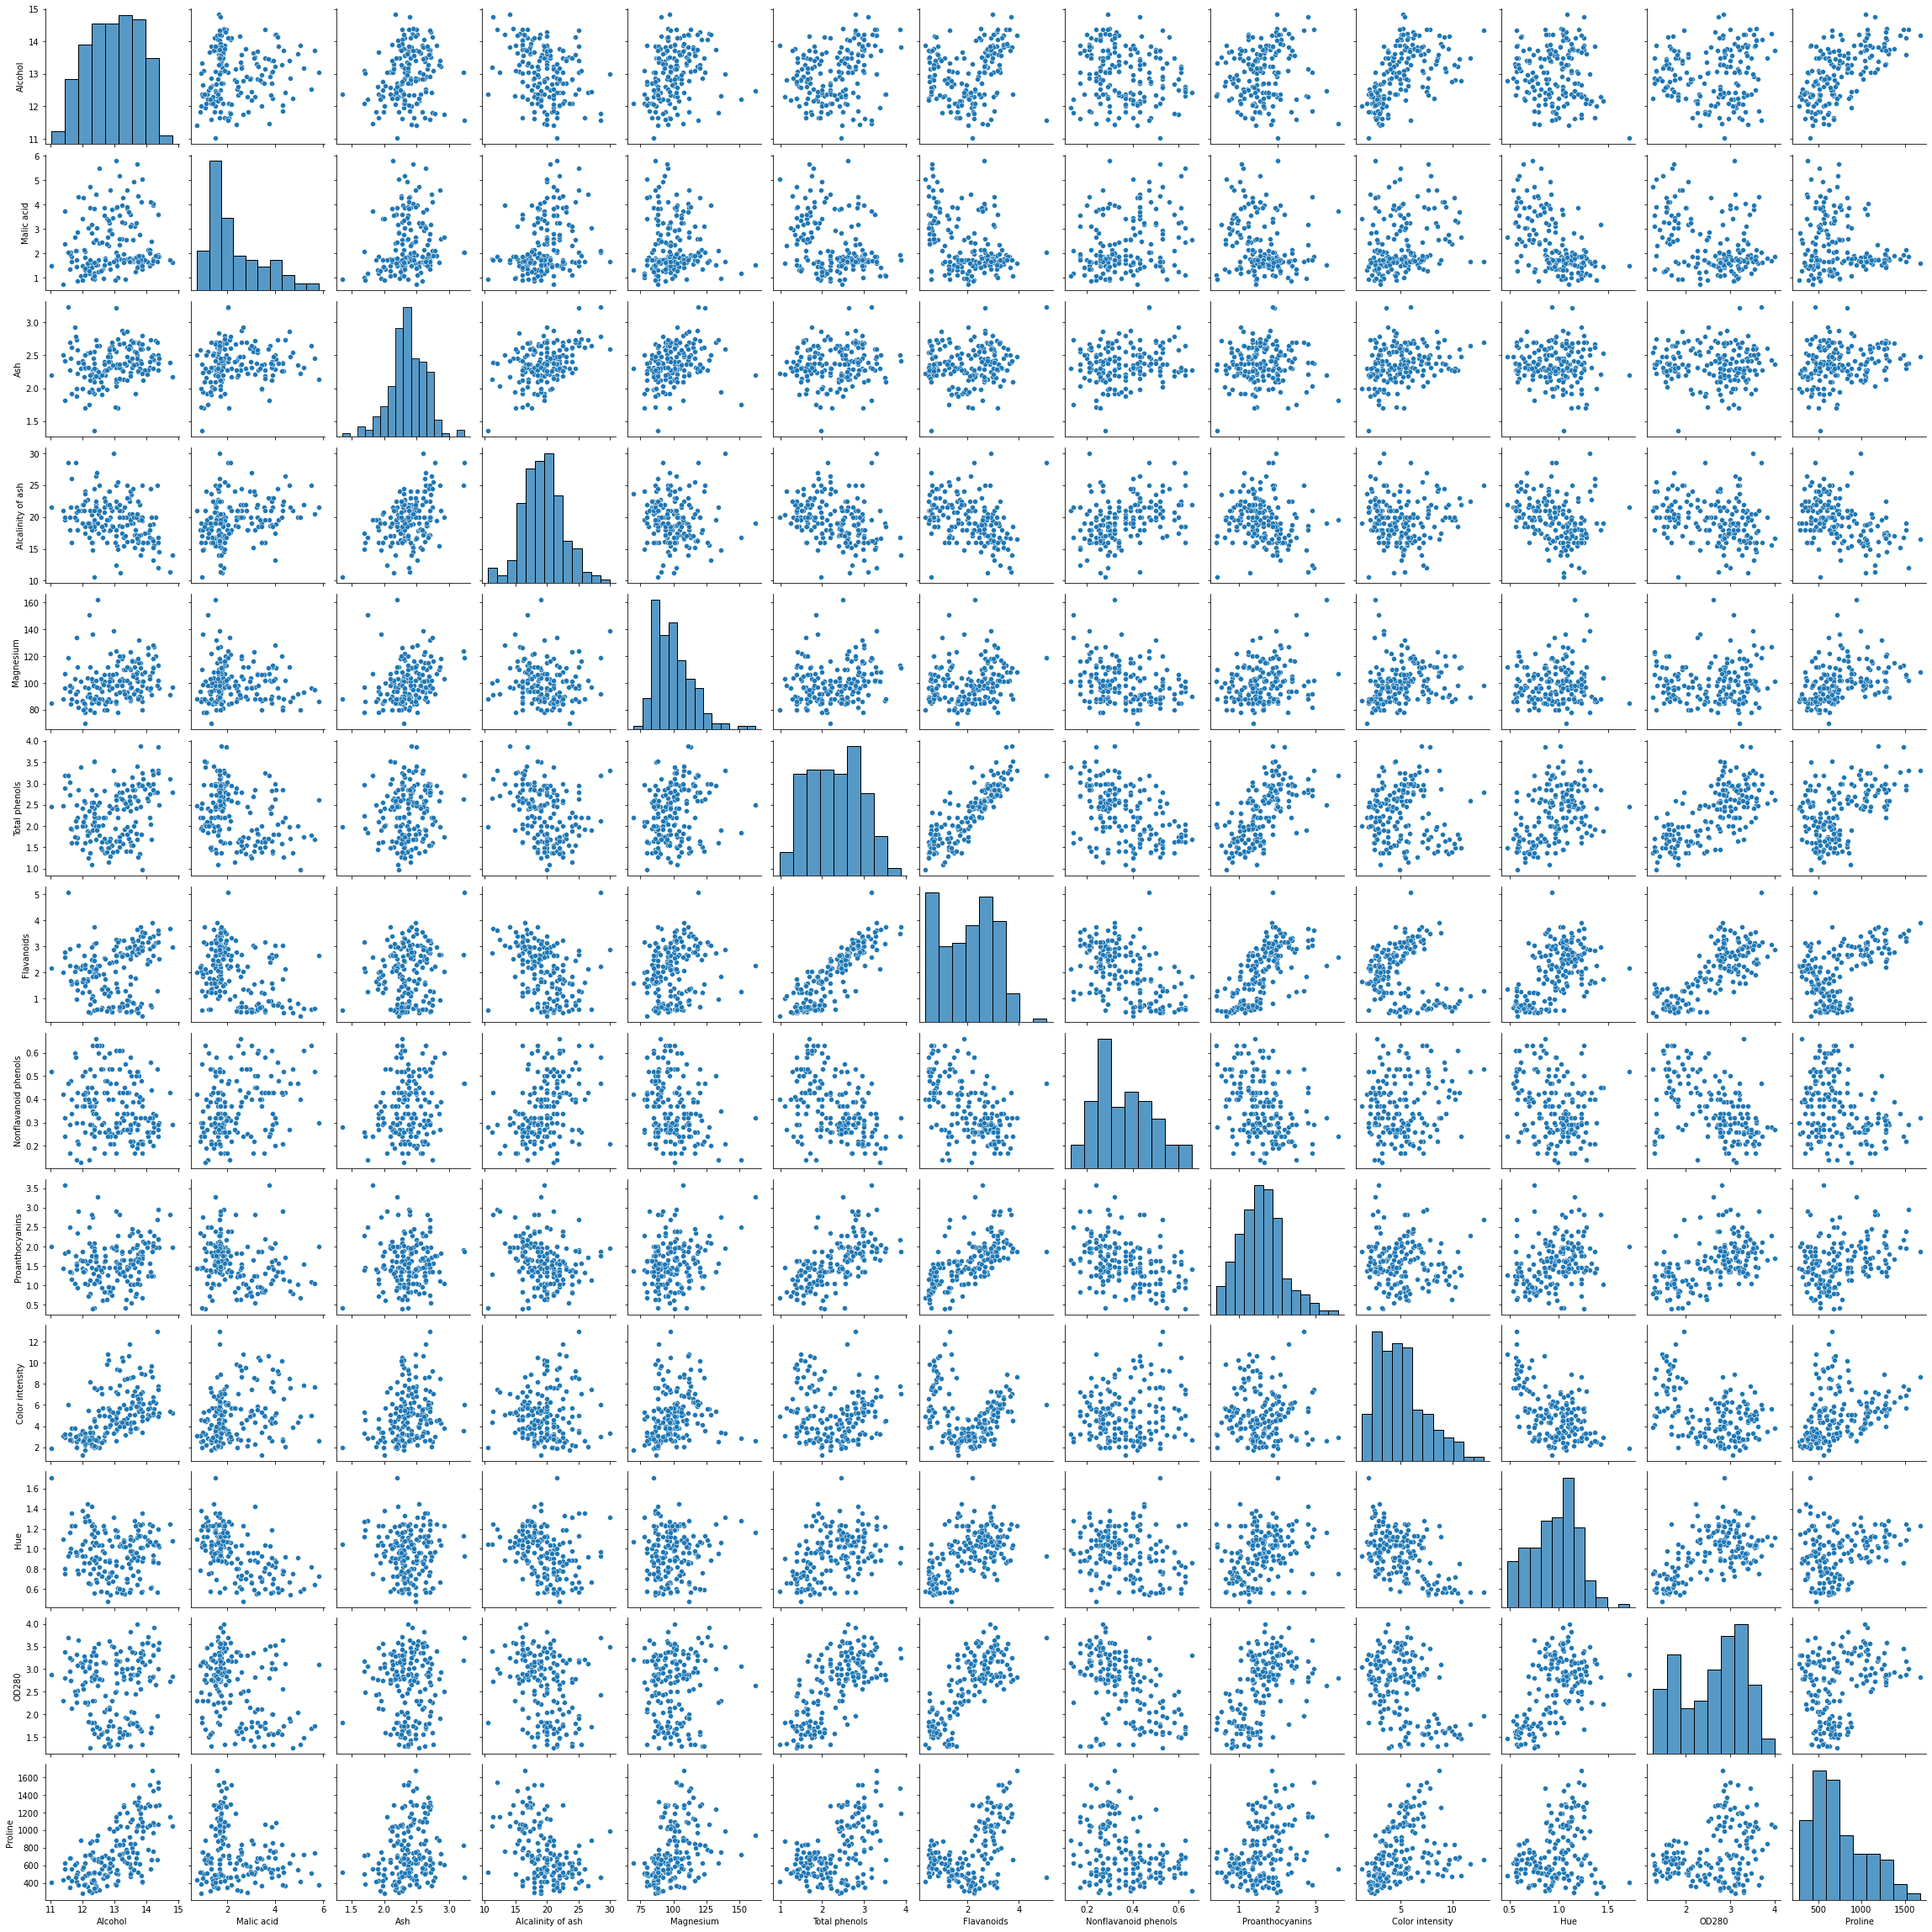

In [83]:
sns.pairplot(df)

### Try to visualize data with correlation heatmap? Can you find any pairs of attributes which have large correlation?

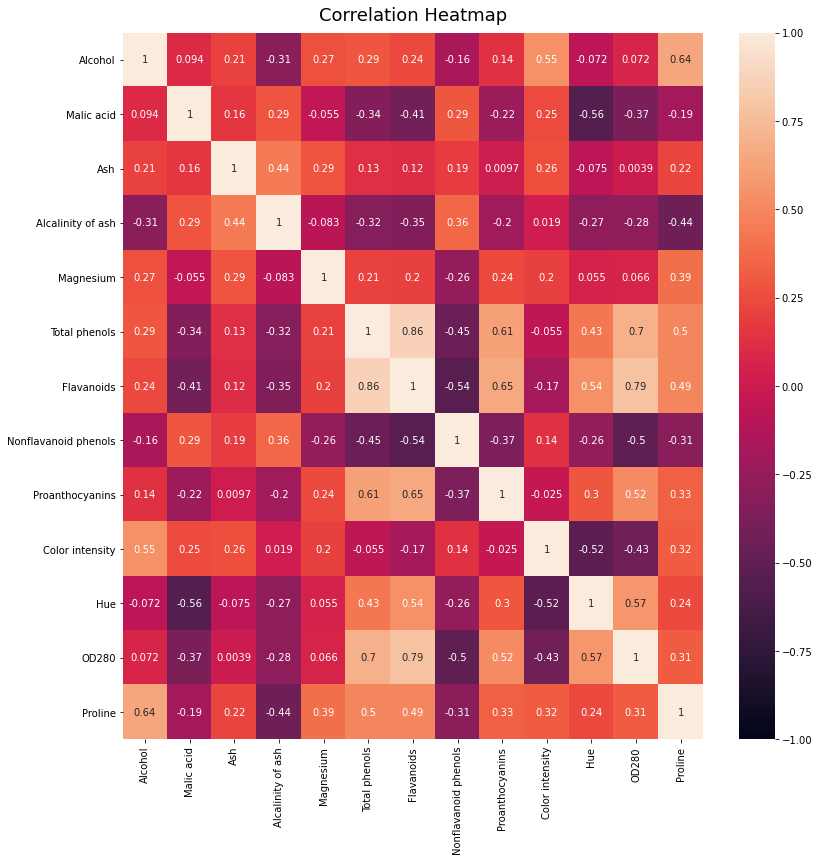

In [84]:
size = df.columns.size

plt.figure(figsize=(size, size))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Normalize data by removing the mean and scaling to unit variance using `preprocessing.StandardScaler`.

In [135]:
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(df)
X_scaled_array = standardScaler.transform(df)
normalizedData = pd.DataFrame(X_scaled_array, columns = df.columns)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


### Use kMeans to cluster the normalized data (By using Elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering) , the number of clusters should be 3). Use pairplot to visualize the wine attributes with their cluster.

In [137]:
pca = sklearnPCA(n_components=6)
transformed = pd.DataFrame(pca.fit_transform(df))
kMeansClustering = KMeans(n_clusters = 3, random_state=size)
res = kMeansClustering.fit_predict(normalizedData)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


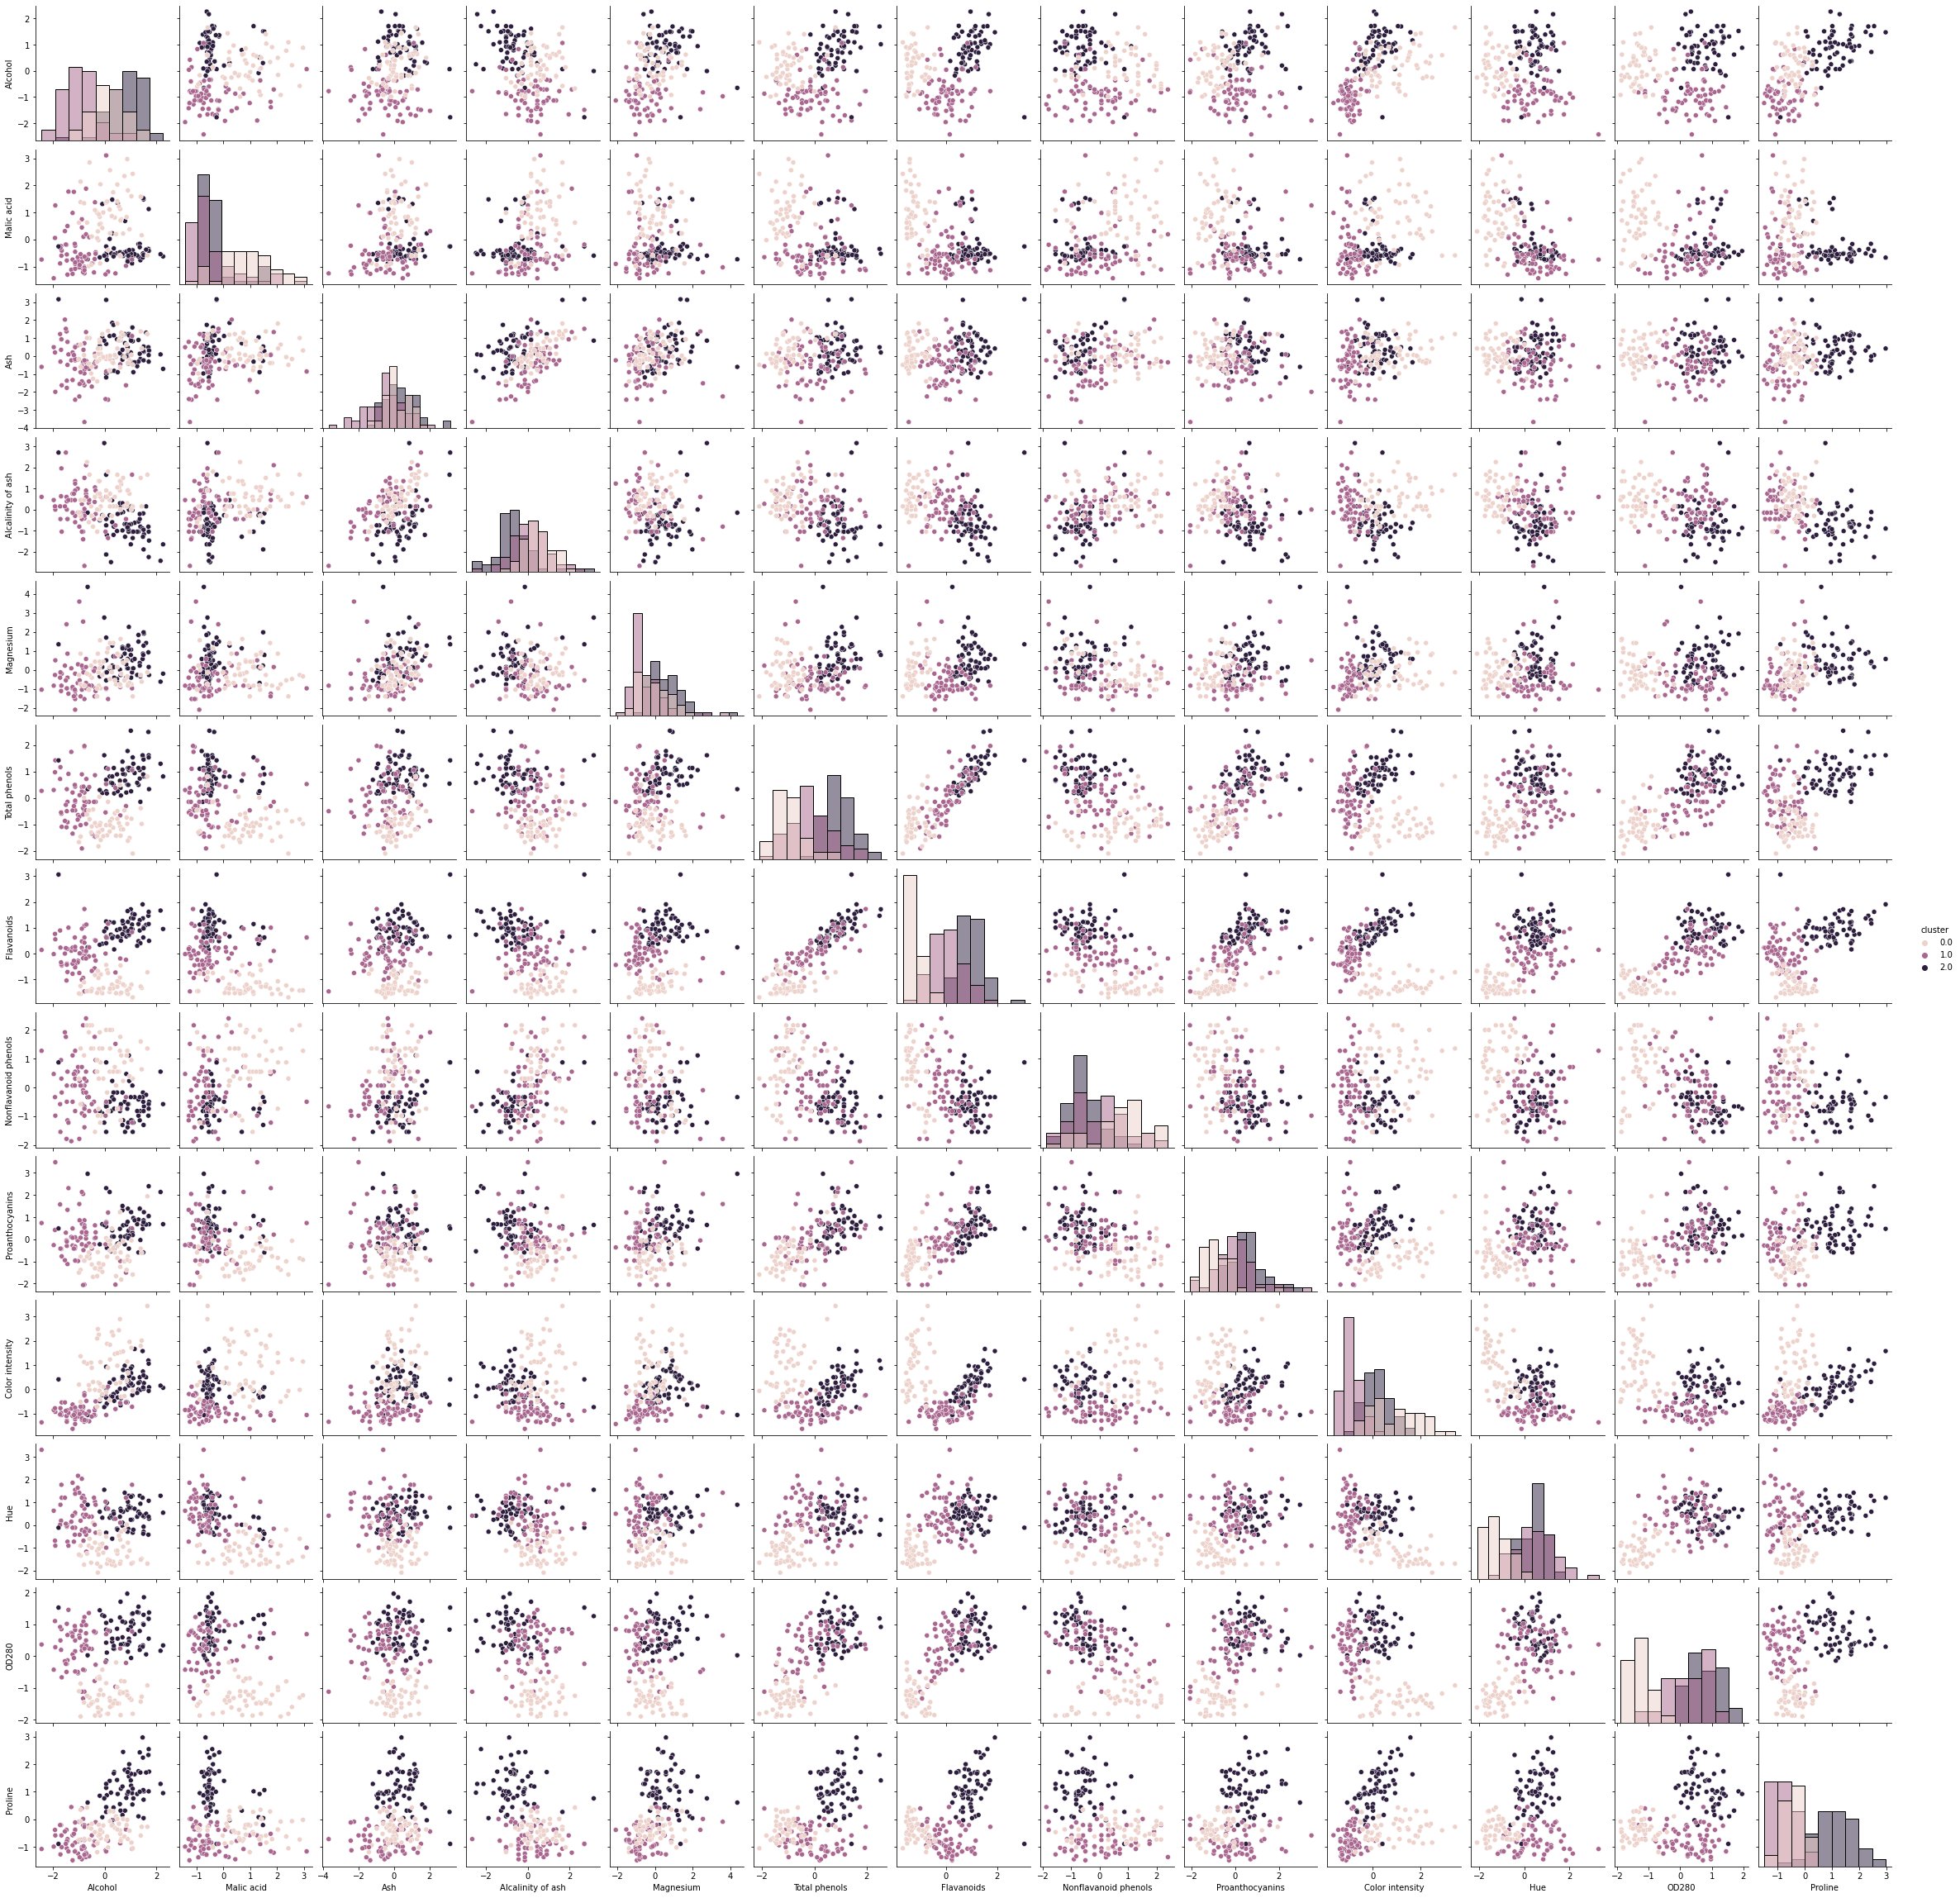

In [140]:
label_pred_KM_PCA = kMeansClustering.labels_
adjusted_rand_score(label, label_pred_KM_PCA)
normalizedData ["cluster"] = label_pred_KM_PCA.astype('float64')
sns_plot = sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")